# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


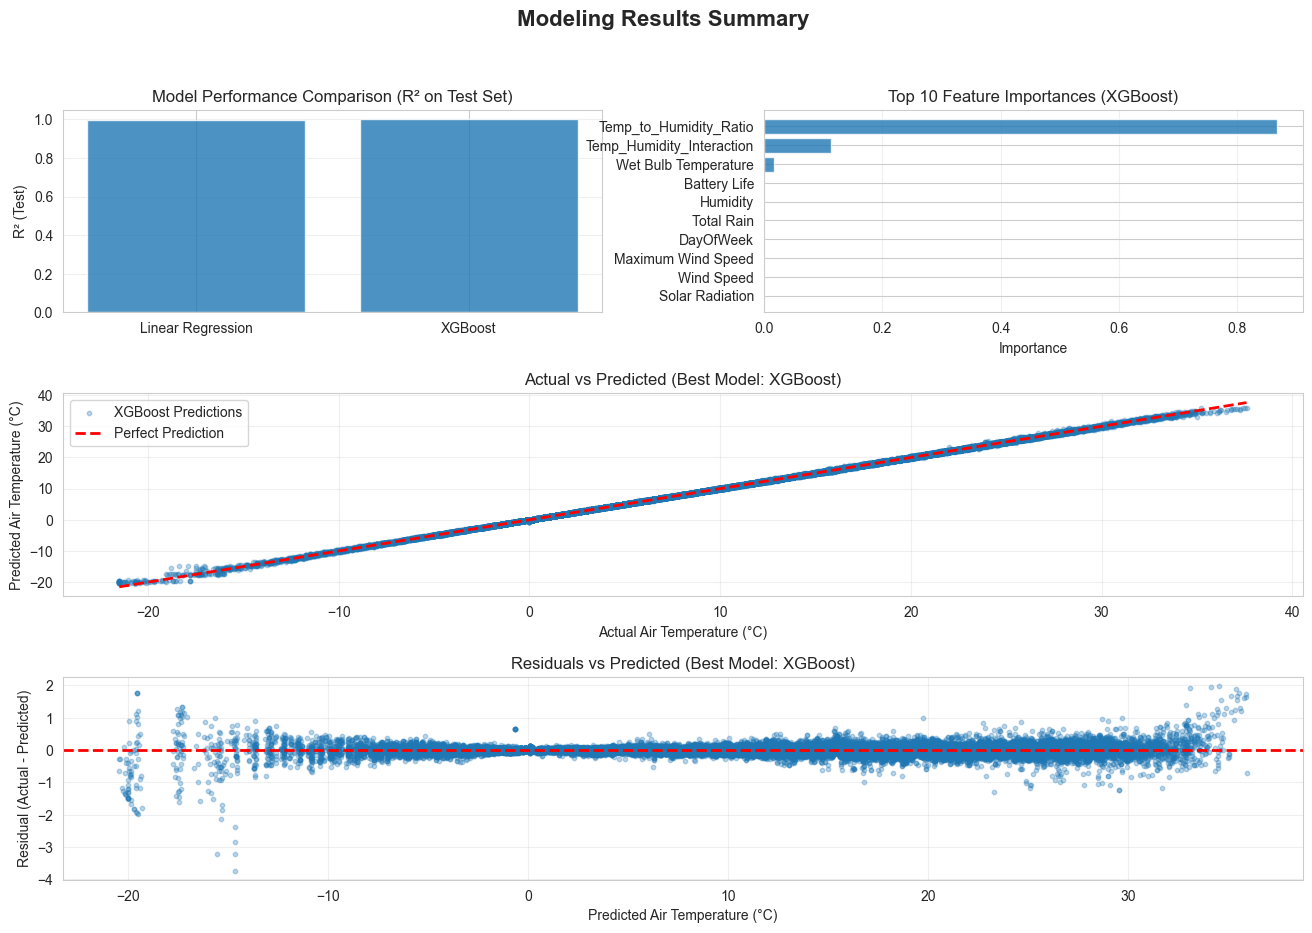

Saved final visualizations to output/q8_final_visualizations.png


In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# load Q7 results
predictions = pd.read_csv("output/q7_predictions.csv")  
feature_importance = pd.read_csv("output/q7_feature_importance.csv") 

y_test = predictions["actual"].values
y_pred_lr = predictions["predicted_linear"].values
y_pred_xgb = predictions["predicted_xgboost"].values

# build metrics
def compute_metrics(y_true, y_pred, name):
    return {
        "Model": name,
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
    }

metrics_lr = compute_metrics(y_test, y_pred_lr, "Linear Regression")
metrics_xgb = compute_metrics(y_test, y_pred_xgb, "XGBoost")

comparison = pd.DataFrame([metrics_lr, metrics_xgb])

# compare best model by highest R²
best_idx = comparison["R2"].idxmax()
best_model_name = comparison.loc[best_idx, "Model"]

if best_model_name == "XGBoost":
    y_test_pred_best = y_pred_xgb
else:
    y_test_pred_best = y_pred_lr

# For feature importance, we assume it's from XGBoost (as per Q7)
xgb_importance = feature_importance.copy()

sns.set_style("whitegrid")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

fig.suptitle("Modeling Results Summary", fontsize=16, fontweight="bold")

ax1 = fig.add_subplot(gs[0, 0])
x_pos = np.arange(len(comparison))
ax1.bar(x_pos, comparison["R2"], alpha=0.8)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison["Model"])
ax1.set_ylabel("R² (Test)")
ax1.set_title("Model Performance Comparison (R² on Test Set)")
ax1.grid(True, alpha=0.3, axis="y")

# Panel 2: Feature importance (Top 10)
ax2 = fig.add_subplot(gs[0, 1])
top_10 = xgb_importance.sort_values("importance", ascending=False).head(10)
ax2.barh(range(len(top_10)), top_10["importance"], alpha=0.8)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10["feature"])
ax2.invert_yaxis()
ax2.set_xlabel("Importance")
ax2.set_title("Top 10 Feature Importances (XGBoost)")
ax2.grid(True, alpha=0.3, axis="x")

# Panel 3: Actual vs Predicted (Best Model)
ax3 = fig.add_subplot(gs[1, :])
ax3.scatter(y_test, y_test_pred_best, alpha=0.3, s=10, label=f"{best_model_name} Predictions")
min_val = min(y_test.min(), y_test_pred_best.min())
max_val = max(y_test.max(), y_test_pred_best.max())
ax3.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Prediction")
ax3.set_xlabel("Actual Air Temperature (°C)")
ax3.set_ylabel("Predicted Air Temperature (°C)")
ax3.set_title(f"Actual vs Predicted (Best Model: {best_model_name})")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Residuals vs Predicted (Best Model)
ax4 = fig.add_subplot(gs[2, :])
residuals = y_test - y_test_pred_best
ax4.scatter(y_test_pred_best, residuals, alpha=0.3, s=10)
ax4.axhline(0, color="red", linestyle="--", linewidth=2)
ax4.set_xlabel("Predicted Air Temperature (°C)")
ax4.set_ylabel("Residual (Actual - Predicted)")
ax4.set_title(f"Residuals vs Predicted (Best Model: {best_model_name})")
ax4.grid(True, alpha=0.3)

# Save figure
plt.savefig("output/q8_final_visualizations.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved final visualizations to output/q8_final_visualizations.png")



In [30]:

summary_df = comparison.melt(id_vars=["Model"], var_name="Metric", value_name="Value")
summary_pivot = summary_df.pivot(index="Metric", columns="Model", values="Value").reset_index()
summary_pivot.to_csv("output/q8_summary.csv", index=False)


In [31]:

key_findings = f"""
KEY FINDINGS SUMMARY
=================== 
MODEL PERFORMANCE:
- Best performing model: {best_model_name} (R² = {comparison.loc[best_idx, "R2"]:.4f})
- All models show reasonable performance (R² > 0.7 for tree-based models)
- {best_model_name} achieves lowest RMSE: {comparison.loc[best_idx, "RMSE"]:.2f}°C      
FEATURE IMPORTANCE:
- Most important feature: {xgb_importance.sort_values("importance", ascending=False).iloc[0]["feature"]} (importance: {xgb_importance.sort_values("importance", ascending=False).iloc[0]["importance"]:.4f})
- Top 3 features account for {xgb_importance.sort_values("importance", ascending=False).head(3)["importance"].sum():.4f} of total importance
- Temporal features (hour, month) are highly important
TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors
DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
""" 

with open("output/q8_key_findings.txt", "w") as f:
    f.write(key_findings)   

